# 6:SIMPLE LINEAR REGRESSION

1.Implement Linear Regression and calculate sum of residual error on the following datasets.

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]

Compute the regression coefficients using analytic formulation and calculate Sum Squared Error (SSE) and Mean Absolute Error (MAE) values. Draw the residual plot.

Beta0 = 1.2363636363636363
Beta1 = 1.1696969696969697
SSE = 152.87575757575758
MAE = 3.2563636363636363


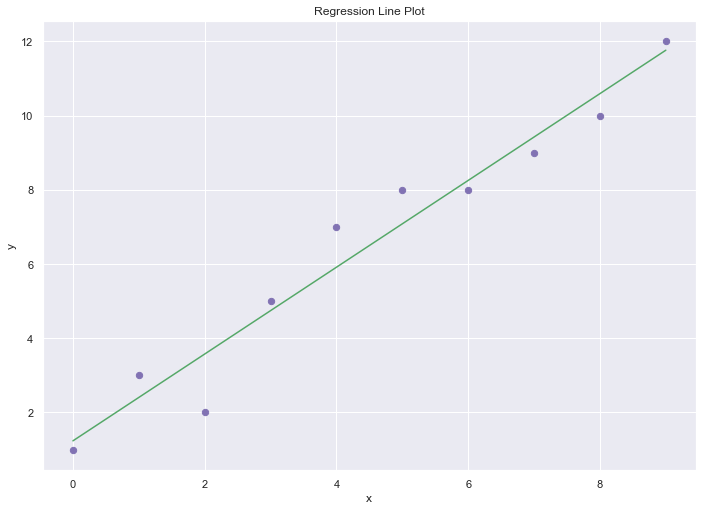

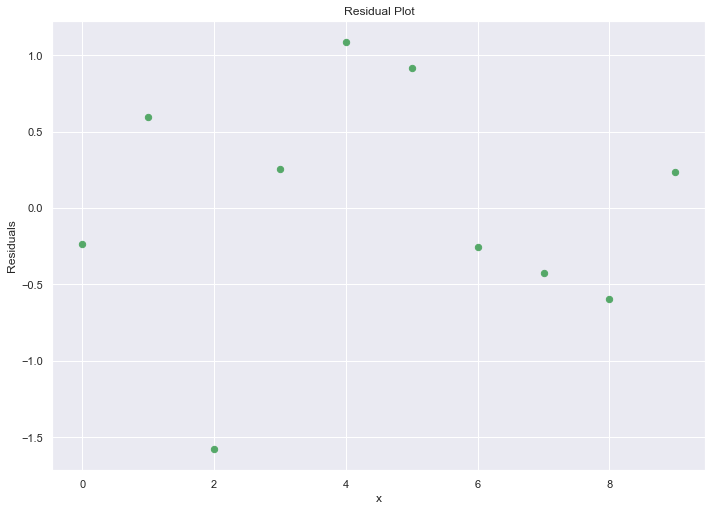

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])
n = np.size(x)
b = [0,0]
e = [0,0]
def estimate_coef(x, y):
    mx = np.mean(x)
    my = np.mean(y)
    beta = [0,0]
    sy = np.sum(y*x) - n*my*mx
    sx = np.sum(x*x) - n*mx*mx
    beta[1] = sy/sx
    beta[0] = my-(beta[1]*mx)
    return beta
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = 'm', marker = 'o', s = 40)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = 'g')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Regression Line Plot')
    plt.show()
    res = y - y_pred
    plt.scatter(x, res, color = 'g', marker = 'o',s = 40)
    plt.xlabel('x')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()
def error_measurement(x ,y, b):
    err = [0,0]
    y_pred = b[0] + b[1]*x
    mx = np.mean(x)
    m = np.full((1,n),mx)
    d = (y_pred-m)
    d = d * d
    err[0] = np.sum(d)
    d=0
    d = abs(y_pred - m)
    err[1] = np.mean(d)
    return err   
b = estimate_coef(x, y)
e = error_measurement(x, y, b)  
print("Beta0 =",b[0])
print("Beta1 =",b[1])
print("SSE =",e[0])
print("MAE =",e[1])
plot_regression_line(x, y, b)

2.Download Boston Housing Rate Dataset. Analyse the input attributes and find out the attribute that best follow the linear relationship with the output price. Implement both the analytic formulation and gradient descent (stochastic) on LMS loss formulation to compute the coefficients of regression matrix and compare the results using SSE and MAE.

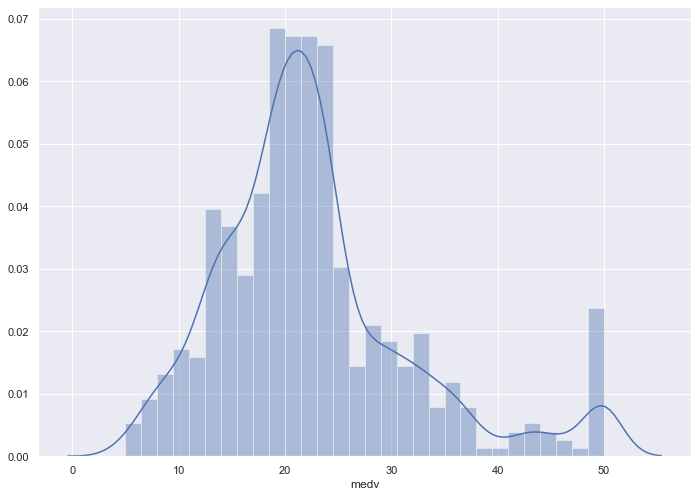

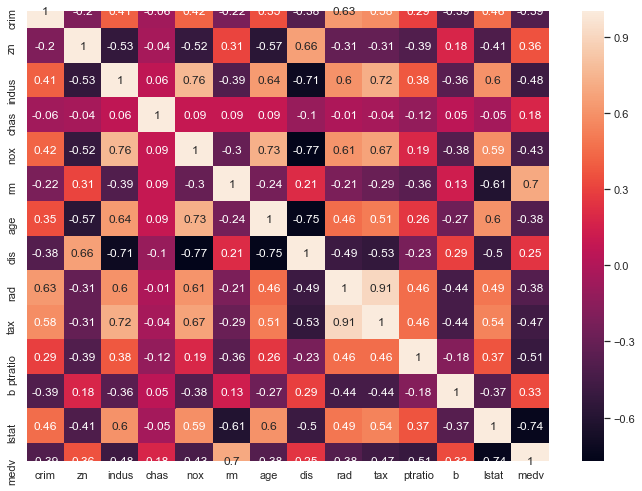

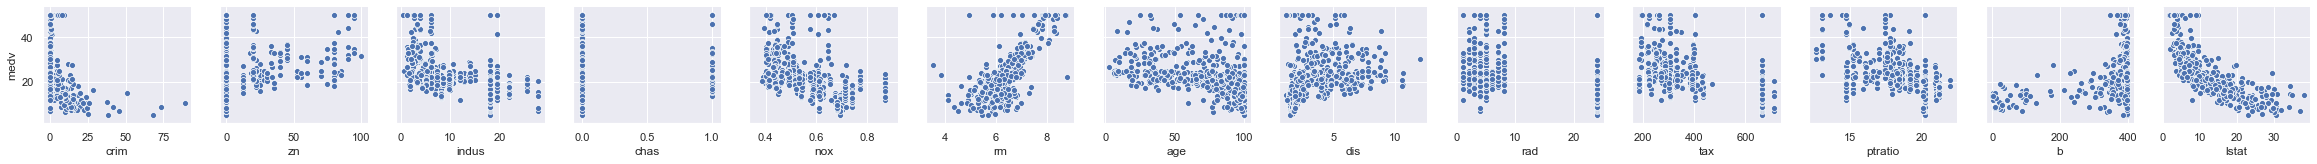

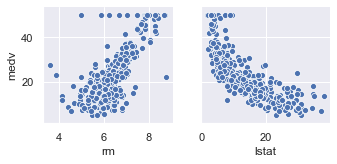

The Mean squared error for test data is 32.8909
The Mean absolute error for test data is 4.2570


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
def dropColumns(xData,dataset):
    # plot the data
    sns.pairplot(dataset, x_vars = xData.columns.values, y_vars = ['medv'])
    plt.show()
    # drop the columns that has no relation with the dependent variable
    xData = xData.drop(columns = ['chas','rad','zn','age','tax','b','indus','nox','crim','dis','ptratio'])
    sns.pairplot(dataset, x_vars = xData.columns.values, y_vars = ['medv'])
    plt.show()
    return xData
def dataAnalysis(xData,dataset):
    sns.set(rc = {'figure.figsize':(11.7,8.27)})
    sns.distplot(dataset['medv'], bins = 30)
    plt.show()
    #find the correalted variables
    corelationMatrix = dataset.corr().round(2)
    sns.heatmap(data = corelationMatrix,annot=True)
    plt.show()
    xData = dropColumns(xData,dataset)
    return xData
#read the dataset
dataset = pd.read_csv("boston.csv")
# find dependent and independent variables
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
x = dataAnalysis(x, dataset)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=45, train_size=0.7)
lr = LinearRegression()
#fit the train data
lr.fit(x_train, y_train)
#predict for the test data
y_pred = lr.predict(x_test)
error1 = mean_squared_error(y_test, y_pred)
error2 = mean_absolute_error(y_test, y_pred)
print("The Mean squared error for test data is {:.4f}".format(error1))
print("The Mean absolute error for test data is {:.4f}".format(error2))

Submitted By:
Sachin Rawat
RA1912039010003
M.Tech Big Data Analytics